# The rectangle rule

We have just shown illustratively how numerical integration works using the rectangle method. We will discuss other methods later, but first we will walk through how to code up the rectangular integration method together. If you feel like you can already do this given the illustrations, try to jump straight in and code up a function to integrate $e^{-x^2}$ between 0.5 and 2 using the rectangle rule and compare with the number we computed (0.4208). Otherwise follow through the following steps with us.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

### Guided exercise part 1

The first step in this process is to place our rectangles. We will begin by deciding where the *edges* of the rectangles are. To do so we will write a function `rectangle_edges` which takes 3 inputs `N` the number of edges that we want, `lower_val` the value of the smallest edge, `upper_val` the value of the highest edge. In this function you will need to

1. Define an array of `N` linearly spaced x values between `lower_val` and `upper_val`.
1. Return that array

In [ ]:
def rectangle_edges(N, lower_val, upper_val):
    # COMPLETE THIS FUNCTION AS DESCRIBED


To test your function, run the following code.

In [ ]:
print("This should read [0.5, 0.8, 1.1, 1.4, 1.7, 2]")
print(rectangle_edges(6, 0.5, 2.0))

This should read [0.5, 0.8, 1.1, 1.4, 1.7, 2]
[0.5 0.8 1.1 1.4 1.7 2. ]


## Guided exercise part 2

Write a function `compute_stepsize` that computes the gap between the rectangles. **HINT** the rectangles are equally spaced so you only have to compute the gap between the first two points.

In [ ]:
def compute_step_size(rect_edges):
    # COMPLETE CODE

rect_edges = rectangle_edges(6, 0.5, 2.0)
stepsize = compute_step_size(rect_edges)

print("Stepsize should be 0.3")
print(f"Stepsize is {stepsize}")

Stepsize should be 0.3
Stepsize is 0.30000000000000004


### Guided exercise part 3

We now need to identify the midpoint (on the x-axis) of each of the rectangles. Again, let's describe what is needed:

1. Write a function `f_midpoint`. This function should take 2 input values `lower_edge` and `upper_edge` and return the midpoint. For example if the lower_edge is 0.5 and the upper_edge is 1, the midpoint is 0.75 (which is halfway between 0.5 and 1).
2. Use the `f_midpoint` function to find the midpoint of all your rectangles. *HINT* our example above used 5 rectangles. But 5 rectangles have 6 edges. Therefore if we use N=6 when calling `rectangle_edges` we will expect only 5 rectangles, and so 5 midpoints. You could do this in a for loop, but is it possible to do it using *slicing* of numpy arrays? (Do whatever you are happiest with, and talk to us if it is unclear.)

In [ ]:
# Write your function f_midpoint here


# Create our set of 5 rectangles from before
rect_edges = rectangle_edges(6, 0.5, 2.0)
stepsize = compute_step_size(rect_edges)
# Now write code to compute the midpoints of these rectangles
# INSERT CODE HERE



print("The midpoints should be [0.65, 0.95, 1.25, 1.55, 1.85")
print(rect_midpoints) # Change the variable name if you called it something else

The midpoints should be [0.65, 0.95, 1.25, 1.55, 1.85
[0.65 0.95 1.25 1.55 1.85]


## Guided exercise part 4

Write a function to compute $e^{-x^2}$. It should take as input a numpy array of x values, and return an array of $e^{-x^2}$ for all inputs.

In [ ]:
def compute_ex2(x_values):
    # Complete function below


rect_edges = rectangle_edges(6, 0.5, 2.0)
stepsize = compute_step_size(rect_edges)
rect_midpoints = f_midpoints(rect_edges[:-1], rect_edges[1:])

y_values = compute_ex2(rect_midpoints)

print("The y_values should be [0.65540625 0.40555451 0.20961139 0.09049144 0.03263076]")
print(f"The y_values are {y_values}")

The y_values should be [0.65540625 0.40555451 0.20961139 0.09049144 0.03263076]
The y_values are [0.65540625 0.40555451 0.20961139 0.09049144 0.03263076]


## Guided exercise part 5

Now we can make a plot to illustrate this. If all your functions above work, you should just be able to run the code below and produce the plots we used for illustration earlier!

(0.5, 2.0)

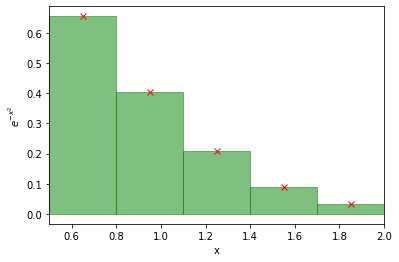

In [ ]:
# These 4 values are the things that are specific to this example. If we changed these we could compute any integral in this way
N_rectangles = 5
lower_bound = 0.5
upper_bound = 2.0
function = compute_ex2

rect_edges = rectangle_edges(N_rectangles+1, lower_bound, upper_bound)
stepsize = compute_step_size(rect_edges)
rect_midpoints = f_midpoints(rect_edges[:-1], rect_edges[1:])
y_values = function(rect_midpoints)

# Plot the red crosses
plt.plot(rect_midpoints, y_values, 'rx') # Plot the line

# Plot the rectangles, this is a bit more involved
for index in range(N_rectangles):
    plt.fill([rect_edges[index], rect_edges[index], rect_edges[index+1], rect_edges[index+1]],
             [0, y_values[index], y_values[index], 0], alpha=0.5, color='green', linestyle='-')
plt.xlabel('x')
plt.ylabel('$e^{-x^2}$')
plt.xlim(0.5,2)



## Guided exercise part 6

Now we can compute the integral. To do this we write another function `compute_rect_area`. This function takes as input `y_values` the height of the rectangles and `stepsize` the width of the rectangles. Note the `y_values` should be a numpy array (as it is different for each rectangle), but `stepsize` is just a single value (as all rectangles have the same width). This function should then:

1. Compute the area of each rectangle. Remember area = width * height, so you can quickly compute the area for each rectangle.
1. Sum the area of all the rectangles up
1. Return the sum of the areas of all the rectangles

In [ ]:
def compute_rect_area(y_values, stepsize):
    # COMPLETE CODE HERE

rect_edges = rectangle_edges(6, 0.5, 2.0)
stepsize = compute_step_size(rect_edges)
rect_midpoints = f_midpoints(rect_edges[:-1], rect_edges[1:])
y_values = compute_ex2(rect_midpoints)

# Now the new bit
integral = compute_rect_area(y_values, stepsize)

print("The integral should be 0.4181083032593553")
print(f"The integral was computed to be {integral}")

The integral should be 0.4181083032593553
The integral was computed to be 0.4181083032593553


## Guided exercise part 7

Well done. You've just computed the numerical integral of $e^{-x^2}$. Now let's tie all this together so we can more easily compute other integrals, and change the ranges. To do this:

Write a function `compute_rectangle_integral(function, lower_val, upper_val, num_rectangles)`. The function should be the function to compute (ie. compute_ex2) in the example above, `lower_val` is the lower value of integration, `upper_val` is the upper value and `num_rectangles` is the number of rectangles to use.

Within this function you should call all the things you've already written, so:

1. Call `rectangle_edges` to get the edges of your rectangles
1. Call `compute_step_size` to get the step size.
1. Call `f_midpoints` to get the midpoints of your rectangles
1. Call `function` to get the y_values (the heights) of your rectangles.
1. Call `compute_rect_area` to get the integral.
1. Return the integral.

In [ ]:
def compute_rectangle_integral(function, lower_val, upper_val, num_rectangles):
    # COMPLETE THIS CODE BELOW


integral = compute_rectangle_integral(compute_ex2, 0.5, 2, 100)
print("The integral should be 0.42079376964408877")
print(f"The integral is {integral}")

The integral should be 0.42079376964408877
The integral is 0.42079376964408877


## Exercise

Now compute the integral of $e^{-x^2}$ between $x=0.5$ and $x=2$ computed using the rectangle rule using 100 rectangles.


In [ ]:
# ADD CODE BELOW


## Exercise

Make a plot of the accuracy of the integral of $e^{-x^2}dx$ between $x=0.5$ and $x=2$ computed using the "rectangle rule" as a function of the number of rectangles used.

The x-axis of the plot should be the number of rectangles used in the integral. Vary this between 1 rectangle and 100 rectangles. The y-axis should show the value of the integral.

**HINT** You don't need to write any integration code here, it's all provided above. Just remove the plotting calls, then call the existing code for many values of the number of rectangles, store the outputs in a list, and then plot.

In [ ]:
# ADD CODE BELOW


Hopefully you can see that the integral very quickly approaches one value. Surprisingly (at least to me) we don't need many rectangles at all to accurately compute the integral of this function!

## Exercise

Now repeat the process for the other two integrals:

Make a plot of the accuracy of $\int_1^3\frac{\sin{x}}{x} dx$ computed using the "rectangle rule" as described above.

The x-axis of the plot should be the number of rectangles used in the integral vary this between 1 rectangle and 100 rectangles. The y-axis should show the value of the integral.

**HINT** All you have to do is copy the previous solution and change the function used, and the range used. You will need to write a function to compute $\frac{\sin{x}}{x}$ to replace the `compute_ex2` function.

**HINT** I compute this integral to be roughly 0.90257

In [1]:
# ADD CODE BELOW


Make a plot of the accuracy of $\int_1^3 \sqrt{\sin{x}} dx$ computed using the "rectangle rule" as described above.

The x-axis of the plot should be the number of rectangles used in the integral vary this between 1 rectangle and 100 rectangles. The y-axis should show the value of the integral.

I computed the integral to be 1.717835 here.


### Rectangle rule - summarized

The rectangle rule is a simple approximation for numerically integrating a function. It can also be done on pen and paper if you want to integrate a function you have plotted .... But we live in a world with computers, so do we really want to do that in the 2020s?

We have shown for the example functions shown that we only need a relatively small number of rectangles to compute this, with a very low computational cost. We have demonstrated how we can show that the integral is "converging" to the right answer by plotting the integral as a function of the number of rectangles used. We will not get a different answer if we use 100000000 rectangles, the integral has already converged. However, there may be functions that require many more points than we used here ... But you now know how to check if the integral is accurate enough!

It is possible to compute this using fewer points if we change our approximation to not use rectangles, but to use something else. Let's explore that now.